# Trabalho 2 - Métodos Quantitativos

**Mayara Amanda da Silva** (3º trimestre do Mestrado em Ciência da Computação - UFJF)

### ATIVIDADE AAG02 
Utilizar Spidering/Scraping ou Logging para coletar dados a serem passados
como parâmetro para uma das funções feitas na AAG01. Em outras palavras,
os dados coletados deverão ser “limpados” e passados como parâmetro para
a geração de uma CDF, PDF ou PMF.

In [5]:
import requests
from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 1 - Escolha do site
Para a coleta dos dados, foi usado a técnica **Scraping** que é uma técnica de extração de dados utilizada para coletar dados em sites. O site escolhido aplicarmos essa técnica foi o: https://www.ea.com/pt-br/games/fifa/fifa-20/ratings/fifa-20-player-ratings-top-100. Nesse site, temos o ranqueamento dos 100 melhores jogadores do jogo FIFA 20.


In [6]:
url = "https://www.ea.com/pt-br/games/fifa/fifa-20/ratings/fifa-20-player-ratings-top-100"
html = urlopen(url)
soup = BeautifulSoup(html,"lxml")
title = soup.title
titleText = title.get_text()
print(titleText)

FIFA 20 - Os 100 Melhores nas Classificações dos Jogadores - EA SPORTS - Site Oficial 


### 2 - Desenvolvimento
Foi utilizado a biblioteca **BeautifulSoup** para auxiliar na extração e coleta de dados. O código acima coleta o título da página.
Já o código apresentado abaixo, coleta os dados e os armazena nos vetores declarados como **amostra** e **times**, os jogadores em suas respectivas posições e o clube que cada jogador defende. Sendo assim, a amostra que será utilizada é os 100 melhores jogadores do FIFA 20 e seus clubes. No momento do armazenamento do clube no vetor, foi inserido uma valor 0 no final da string para facilitar a limpeza dos lixos e remoção dos espaços para facilitar a contagem doss times que cada jogador representa.

In [7]:
amostra = [0]*100
times = [0]*100
print("==== Lista dos melhores jogadores do FIFA 20 ==== \n")
section = soup.find_all('ea-tile')
for x in section:
    title = x.find('h3').get_text()
    colocacao = x.find('div').get_text()
    detail = x.find_all('ea-tile-copy')
    for row in detail:
        clube = row.find('p').get_text()
        print(clube)
    amostra[int(colocacao) -1] = title
    times[int(colocacao) -1] = clube+'0'
    print(title, colocacao)
    print("-------------------")

==== Lista dos melhores jogadores do FIFA 20 ==== 

FC Barcelona 
Marc-André ter Stegen 10
-------------------
Real Madrid 
Luka Modrić 9
-------------------
Liverpool 
Mohamed Salah 8
-------------------
Liverpool  
Virgil van Dijk 7
-------------------
Atlético de Madrid 
Jan Oblak 6
-------------------
Manchester City 
Kevin De Bruyne 5
-------------------
Real Madrid 
Eden Hazard  4
-------------------
Paris Saint-Germain 
Neymar Jr. 3
-------------------
Piemonte Calcio 
Cristiano Ronaldo 2
-------------------
FC Barcelona 
Lionel Messi  1
-------------------
FC Barcelona 
Antoine Griezmann  20
-------------------
Liverpool 
Alisson  19
-------------------
Chelsea 
N’Golo Kanté 18
-------------------
Napoli 
Kalidou Koulibaly 17
-------------------
Tottenham Hotspur 
Harry Kane 16
-------------------
Bayern de Munique 
Robert Lewandowski 15
-------------------
Piemonte Calcio 
Giorgio Chiellini 14
-------------------
Manchester City 
Sergio Agüero 13
-------------------
Real Madri

 As amostras dos dados serão exibidas abaixo para melhor visualização dos dados a serem trabalhados. Os dados abaixos encontram-se **"sujos"**.

In [8]:
print('----- Jogadores em ordem do ranking armazenados em suas posições -----\n\n')
print(amostra)
print('----------------------------------------------------------------------\n\n')
print('----- Times respectivos dos jogadores com lixo na string -----\n\n')
print(times)

----- Jogadores em ordem do ranking armazenados em suas posições -----


['Lionel Messi ', 'Cristiano Ronaldo', 'Neymar Jr.', 'Eden Hazard ', 'Kevin De Bruyne', 'Jan Oblak', 'Virgil van Dijk', 'Mohamed Salah', 'Luka Modrić', 'Marc-André ter Stegen', ' Kylian Mbappé ', 'Sergio Ramos ', 'Sergio Agüero', 'Giorgio Chiellini', 'Robert Lewandowski', 'Harry Kane', 'Kalidou Koulibaly', 'N’Golo Kanté', 'Alisson ', 'Antoine Griezmann ', 'Sergio Busquets', 'Luis Suárez', 'David De Gea', 'Raheem Sterling', 'Pierre-Emerick Aubameyang', 'Gerard Piqué', 'Manuel Neuer', 'Sadio Mané', 'Toni Kroos', 'Christian Eriksen', 'Paul Pogba', 'Edinson Cavani ', 'Marco Reus', 'Ederson', 'David Silva ', 'Hugo Lloris ', 'Diego Godín ', 'Paulo Dybala', 'Thibaut Courtois', 'Samir Handanovič', 'Karim Benzema', 'Jordi Alba', 'Mats Hummels', 'Fernandinho ', 'Heung Min Son', 'Toby Alderweireld', 'Bernardo Silva', 'Thiago', 'Aymeric Laporte', 'Dries Mertens', 'Thiago Silva', 'Casemiro', 'Lorenzo Insigne', 'Jan Vertonghen'

Os dados do vetor apresentado acima contém **"lixos"** na string, o que significa que os dados precisam passar por uma limpeza. O código abaixo efetua a limpeza dos dados, fazendo com que seja mais fácil efetuar as análises estatísticas. Em seguida, a amostra após a limpeza será exibida.

In [9]:
for pos in range(100):
    for time in times:
        times[pos] = times[pos].replace('\xa0','') #remove os caracteres \xa0 que apareceram na string após a inserção no vetor

for pos in range(100):
    for time in times:
        times[pos] = times[pos].replace(' 0','') #remove os espaços seguidos de 0

for pos in range(100):
    for time in times:
        times[pos] = times[pos].replace('0','') #remove os 0 sem espaço
        
print(times)

['FC Barcelona', 'Piemonte Calcio', 'Paris Saint-Germain', 'Real Madrid', 'Manchester City', 'Atlético de Madrid', 'Liverpool', 'Liverpool', 'Real Madrid', 'FC Barcelona', 'Paris Saint-Germain', 'Real Madrid', 'Manchester City', 'Piemonte Calcio', 'Bayern de Munique', 'Tottenham Hotspur', 'Napoli', 'Chelsea', 'Liverpool', 'FC Barcelona', 'FC Barcelona', 'FC Barcelona', 'Manchester United', 'Manchester City', 'Arsenal', 'FC Barcelona', 'Bayern de Munique', 'Liverpool', 'Real Madrid', 'Tottenham Hotspur', 'Manchester United', 'Paris Saint-Germain', 'Borussia Dortmund', 'Manchester City', 'Manchester City', 'Tottenham Hotspur', 'Inter de Milão', 'Piemonte Calcio', 'Real Madrid', 'Inter de Milão', 'Real Madrid', 'FC Barcelona', 'Borussia Dortmund', 'Manchester City', 'Tottenham Hotspur', 'Tottenham Hotspur', 'Manchester City', 'Bayern de Munique', 'Manchester City', 'Napoli', 'Paris Saint-Germain', 'Real Madrid', 'Napoli', 'Tottenham Hotspur', 'Paris Saint-Germain', 'Bayern de Munique', 'M

No código abaixo é feito uma contagem de quantos jogadores de cada time existem na amostra.

In [10]:
barcelona = times.count('FC Barcelona')
juventus = times.count('Piemonte Calcio')
psg = times.count('Paris Saint-Germain')
city = times.count('Manchester City')
atletico = times.count('Atlético de Madrid')
liverpool = times.count('Liverpool')
real = times.count('Real Madrid')
bayern = times.count('Bayern de Munique')
tottenham = times.count('Tottenham Hotspur')
napoli = times.count('Napoli')
chelsea = times.count('Chelsea')
inter = times.count('Inter de Milão')
lazio = times.count('Lazio')
valencia = times.count('Valencia CF')
ajax = times.count('Ajax')
sporting = times.count('Sporting CP')
lag = times.count('Los Angeles Galaxy')
arsenal = times.count('Arsenal')
borussia = times.count('Borussia Dortmund')
united = times.count('Manchester United')
atalanta = times.count('Atalanta')
milan = times.count('Milan')

print(tabulate([['Real Madrid', real], ['Barcelona', barcelona], ['Manchester City', city], ['Juventus', juventus], ['Paris Saint-German', psg], ['Bayern de Munique', bayern], ['Liverpool', liverpool],['Tottenham', tottenham], ['Napoli', napoli], ['Atlético de Madrid', atletico], ['Inter de Milão', inter], ['Borussia Dortmund', borussia], ['Lazio', lazio], ['Arsenal', arsenal], ['Manchester United', united], ['Ajax', ajax], ['Atalanta', atalanta], ['Chelsea', chelsea], ['Los Angeles Galaxy', lag], ['Milan', milan], ['Sporting CP', sporting], ['Valencia CF', valencia]], headers=['Time', 'Número de jogadores do time']))

Time                  Número de jogadores do time
------------------  -----------------------------
Real Madrid                                    12
Barcelona                                      10
Manchester City                                10
Juventus                                        9
Paris Saint-German                              9
Bayern de Munique                               8
Liverpool                                       7
Tottenham                                       6
Napoli                                          5
Atlético de Madrid                              4
Inter de Milão                                  4
Borussia Dortmund                               3
Lazio                                           2
Arsenal                                         2
Manchester United                               2
Ajax                                            1
Atalanta                                        1
Chelsea                                         1


Com esses dados em mãos, o próximo passo é apresentar os dados em forma de gráficos. A função de probabilidade escolhida foi a **Função Massa de Probabilidade (FMP)**, que associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade. O método abaixo calcula essa função e gera seus respectivos gráficos.

In [11]:
def gerarNovaPMF(dados):
    df = pd.DataFrame(dados)
    df['P $(x=x)$'] = df['Jogadores']/df['Jogadores'].sum()
    print("Amostra do cálculo do PMF em forma textual\n")
    print(df)
    plt.bar(df['Times'],df['P $(x=x)$'], align='center', alpha=0.5)
    plt.xticks(df['Times'], df['Times'], rotation='vertical')
    plt.title('Gráfico da PMF dos 100 melhores jogadores do FIFA 20 ')

Abaixo será apresentado a amostra que será usada para plotar o gráfico. Essa amostra contém os dados extraídos e limpados nos processos anteriores.

Amostra do cálculo do PMF em forma textual

                 Times  Jogadores  P $(x=x)$
0          Real Madrid         12       0.12
1            Barcelona         10       0.10
2      Manchester City         10       0.10
3             Juventus          9       0.09
4   Paris Saint-German          9       0.09
5    Bayern de Munique          8       0.08
6            Liverpool          7       0.07
7            Tottenham          6       0.06
8               Napoli          5       0.05
9   Atlético de Madrid          4       0.04
10      Inter de Milão          4       0.04
11   Borussia Dortmund          3       0.03
12               Lazio          2       0.02
13             Arsenal          2       0.02
14   Manchester United          2       0.02
15                Ajax          1       0.01
16            Atalanta          1       0.01
17             Chelsea          1       0.01
18  Los Angeles Galaxy          1       0.01
19               Milan          1       0.01
20         

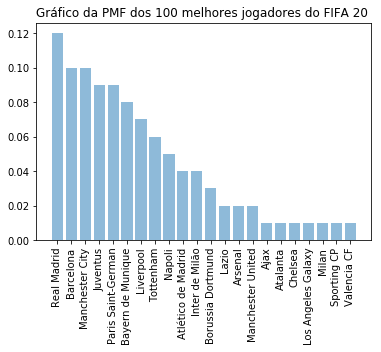

In [12]:
dados = {'Times':['Real Madrid','Barcelona','Manchester City', 'Juventus', 'Paris Saint-German', 'Bayern de Munique',
'Liverpool','Tottenham', 'Napoli', 'Atlético de Madrid', 'Inter de Milão', 'Borussia Dortmund', 'Lazio', 'Arsenal', 'Manchester United', 'Ajax', 'Atalanta', 'Chelsea', 'Los Angeles Galaxy', 'Milan', 'Sporting CP', 'Valencia CF'],
'Jogadores':[12,10,10,9,9,8,7,6,5,4,4,3,2,2,2,1,1,1,1,1,1,1]}

gerarNovaPMF(dados)

### 3 - Conclusão:
Com o gráfico acima, temos que: Em uma amostra com 100 jogadores, 
- 0,12 ou 12% são jogadores do Real Madrid
- 0,10 ou 10% são jogadores do Barcelon
- 0,10 ou 10% são jogadores do Manchester City
- 0,09 ou 9% são jogadores da Juventus
- 0,09 ou 9% são jogadores do Paris Saint-German
- 0,08 ou 8% são jogadores do Bayern de Munique
- 0,07 ou 7% são jogadores do Liverpool
- 0,06 ou 6% são jogadores do Tottenham
- 0,05 ou 5% são jogadores do Napoli
- 0,04 ou 4% são jogadores do Atlético de Madrid
- 0,04 ou 4% são jogadores da Inter de Milão
- 0,03 ou 3% são jogadores do Borussia Dortmund
- 0,02 ou 2% são jogadores da Lazio
- 0,02 ou 2% são jogadores do Arsenal
- 0,02 ou 2% são jogadores do Manchester United
- 0,01 ou 1% são jogadores do Ajax
- 0,01 ou 1% são jogadores da Atalanta
- 0,01 ou 1% são jogadores do Chelsea
- 0,01 ou 1% são jogadores do Los Angelos Galaxy
- 0,01 ou 1% são jogadores do Milan
- 0,01 ou 1% são jogadores do Sporting CP
- 0,01 ou 1% são jogadores do Valencia CF

Como vimos na **PMF**, a soma de todas probabilidades de existirem jogadores de um determinado time na amostra é de 1 ou 100%.
